<a href="https://colab.research.google.com/github/ZeyadAboeleneen/Deep_Learning/blob/main/Ass1_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = (data.drop(columns=['label'],axis=1).values / 255.0).reshape(-1,28,28)
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape , X_test.shape

X_train=tf.image.grayscale_to_rgb(tf.expand_dims(X_train, axis=3))
X_test=tf.image.grayscale_to_rgb(tf.expand_dims(X_test, axis=3))

X_train=tf.image.resize_with_pad(X_train,32,32)
X_test=tf.image.resize_with_pad(X_test,32,32)
vggmodel = VGG16(input_shape=(32,32,3),weights='imagenet', include_top=False)
for layer in vggmodel.layers[:11]:
    layer.trainable = False
for i, layer in enumerate(vggmodel.layers):
    print(i, layer.name, layer.trainable)

top_model = vggmodel.output
top_model = Layers.Flatten()(top_model)
top_model = Layers.Dense(512, activation='relu')(top_model)
top_model = Layers.Dropout(0.5)(top_model)
top_model = Layers.Dense(64, activation='relu')(top_model)
top_model = Layers.Dropout(0.2)(top_model)

output_layer = Layers.Dense(10, activation='softmax')(top_model)
vggmodel = Models.Model(inputs=vggmodel.input, outputs=output_layer)
vggmodel.compile(optimizer=Optimizer.Adam(0.00001),loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])
vggmodel.summary()

0 input_layer_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,010,826 (57.26 MB)

 Trainable params: 13,275,338 (50.64 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5,verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
trained = vggmodel.fit(X_train,y_train,validation_split=0.3,epochs=15,callbacks=[reduce_lr,es],batch_size=128)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.1193 - loss: 2.6653 - val_accuracy: 0.0744 - val_loss: nan - learning_rate: 1.0000e-05
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.0996 - loss: 2.4713 - val_accuracy: 0.1003 - val_loss: nan - learning_rate: 1.0000e-05
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.1568 - loss: 2.3217 - val_accuracy: 0.1715 - val_loss: nan - learning_rate: 1.0000e-05
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.1819 - loss: 2.2230 - val_accuracy: 0.4595 - val_loss: nan - learning_rate: 1.0000e-05
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2886 - loss: 2.0397
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.2907 - loss: 2.0357 - val_accuracy: 0.5858 - val_loss: nan - learning_rate: 1.0000e-05
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.3205 - loss: 1.9364 - val_accuracy: 0.6052 - v

In [ ]:
ModelLoss, ModelAccuracy = vggmodel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.7728 - loss: 1.5888
Test Loss is 1.6070419549942017
Test Accuracy is 0.7652173638343811


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step
              precision    recall  f1-score   support

    Number 0       0.81      1.00      0.89        17
    Number 1       0.92      1.00      0.96        12
    Number 2       1.00      0.60      0.75        15
    Number 3       0.45      0.90      0.60        10
    Number 4       0.69      0.90      0.78        10
    Number 5       0.67      0.50      0.57         8
    Number 6       1.00      0.67      0.80         9
    Number 7       0.62      0.62      0.62         8
    Number 8       1.00      0.45      0.62        11
    Number 9       0.86      0.80      0.83        15

    accuracy                           0.77       115
   macro avg       0.80      0.74      0.74       115
weighted avg       0.82      0.77      0.76       115



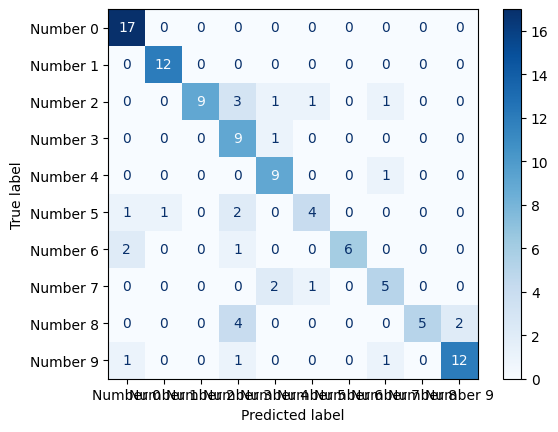

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = np.argmax(vggmodel.predict(X_test),axis=1)
classes = ["Number " + str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names = classes)) #corrected the order of y_true,y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

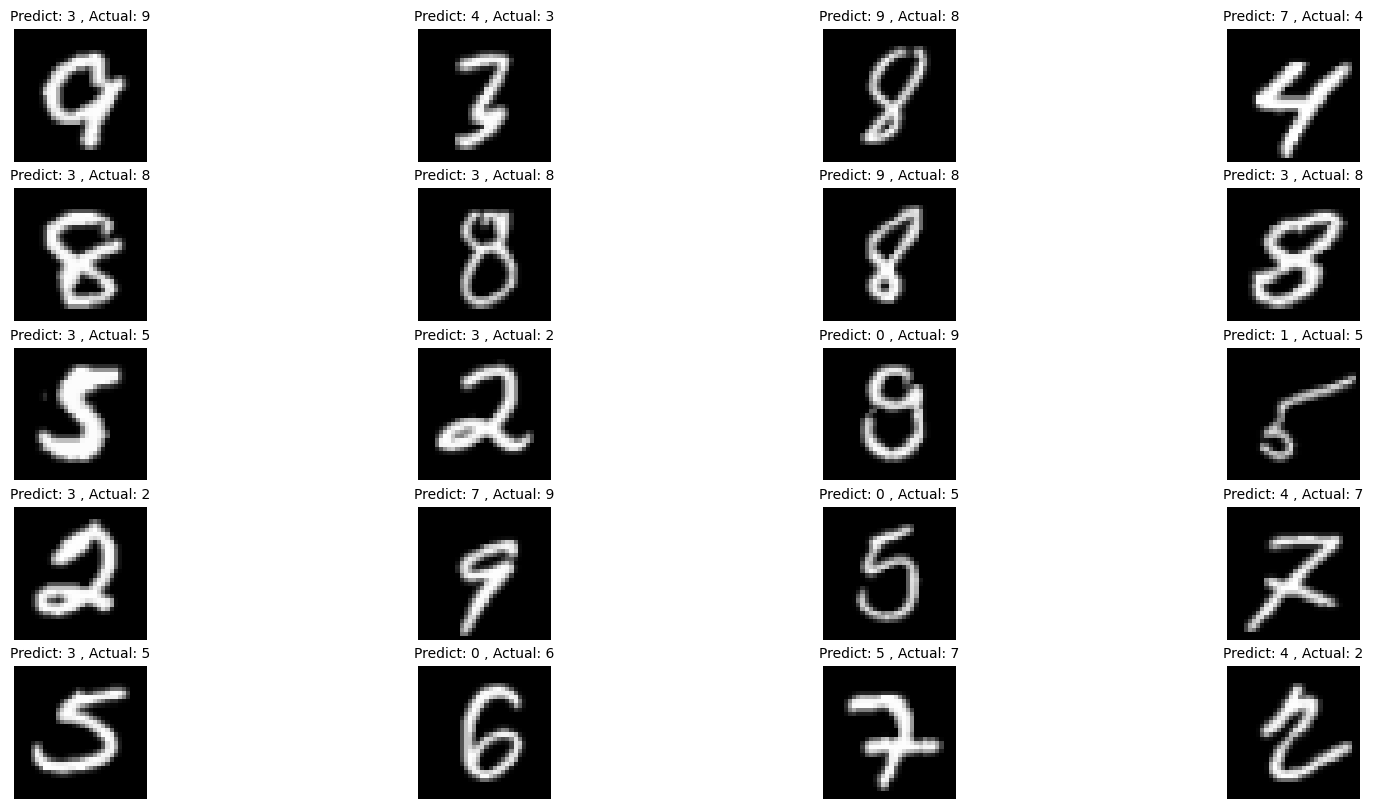

In [ ]:
misclassifiedIndexes = np.where(y_pred !=y_test)[0]

fig, ax = plt.subplots(5, 4,figsize=(20,10));
ax = ax.ravel();
for i, badIndex in enumerate(misclassifiedIndexes[:20]):
    ax[i].imshow(X_test[badIndex])
    ax[i].set_title(f'Predict: {y_pred[badIndex]} , Actual: {np.array(y_test)[badIndex]}', fontsize = 10)
    ax[i].set(frame_on=False)
    ax[i].axis('off')

In [ ]:
Test_data = (pd.read_csv('/content/test.csv').values / 255.0).reshape(-1,28,28)
Test_data=tf.image.grayscale_to_rgb(tf.expand_dims(Test_data, axis=3))
#resize to minimum size of (32x32)
Test_data=tf.image.resize_with_pad(Test_data,32,32)

In [ ]:
results = np.argmax(vggmodel.predict(Test_data),axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 219s 250ms/step


In [ ]:
results[:15]

array([3, 0, 9, 0, 3, 7, 0, 3, 0, 3, 3, 7, 4, 0, 4])

In [ ]:
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1, Test_data.shape[0] + 1),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)